# Aufgabenstellung:
Rechnerübung: Verwenden Sie den Datensatz iris aus Ilias, den Sie bereits bei der Multiplen Linearen Regression kennen gelernt haben. Dieser enthält vier Merkmale von Blütenblättern unterschiedlicher Schwertlilienarten (jeweils Länge und Breite des Sepalum (Kelchblatt) und Petalum(Kronblatt)). Führen Sie eine hierarchische Clusteranalyse durch. Wie viele unterschiedliche Schwertlilienarten sind Ihrer Meinung nach im Datensatz vertreten?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set_theme(style="whitegrid")

# Read Data

In [2]:
df = pd.read_csv("iris.csv", header=None)
df.columns = ['Kelchblattlänge', 'Kelchblattbreite', 'Kronblattlänge', 'Kronblattbreite']

In [3]:
df.head(5)

,Kelchblattlänge,Kelchblattbreite,Kronblattlänge,Kronblattbreite
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# EDA

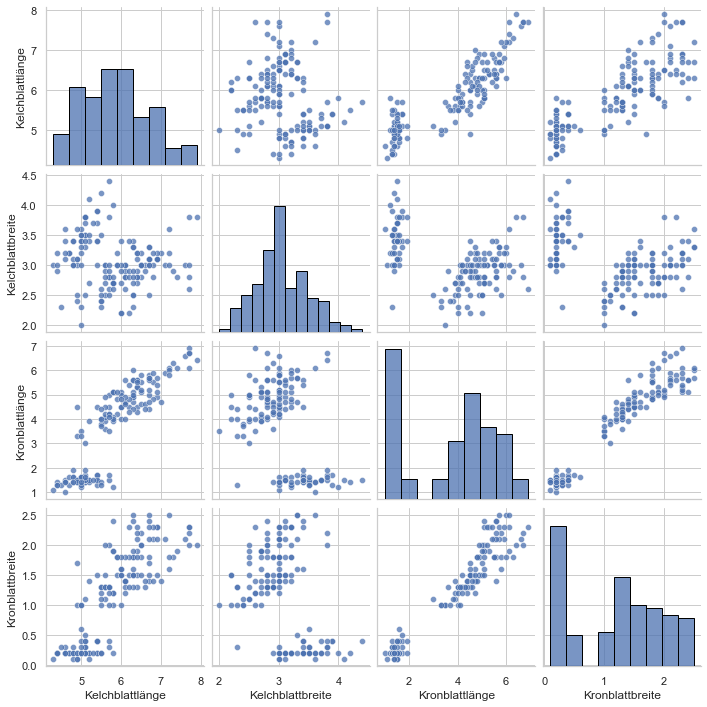

In [4]:
g = sns.pairplot(df,
             plot_kws=dict(alpha=0.75),
             diag_kws=dict(edgecolor="black"))
plt.show()

# Clustering

In [5]:
# Define Params
LINKAGE_TYPE = "complete"

# Create Clustering object with desired parameters
clustering = AgglomerativeClustering(n_clusters=4, linkage=LINKAGE_TYPE)
# Print params
print(clustering.get_params())

{'affinity': 'euclidean', 'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'complete', 'memory': None, 'n_clusters': 4}


In [6]:
# Fit object
clustering.fit(df)
# Append Cluster labels to df
df_cluster = df.copy()
df_cluster["cluster"] = clustering.labels_

In [7]:
df_cluster.head(5)

,Kelchblattlänge,Kelchblattbreite,Kronblattlänge,Kronblattbreite,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Dendrogram
We can use a dendrogram to see the distances where each clusters are merged. Thus we can use a dendrogram to derive the "optimal" cluster number.

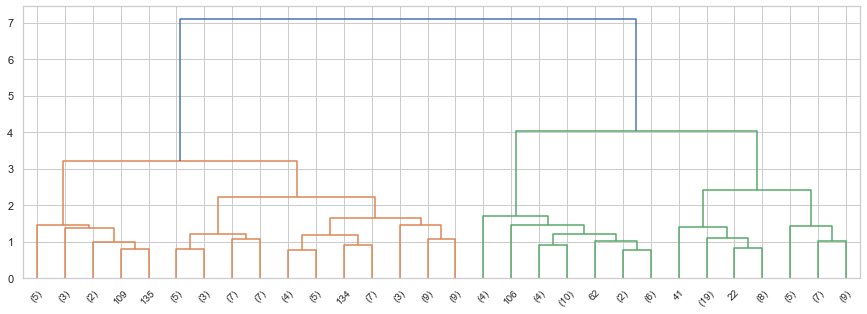

In [8]:
Z = linkage(df, method=LINKAGE_TYPE, metric='euclidean')
plt.figure(figsize=(15, 5))
# Use truncate_mode: Makes the last p link nodes into leaf nodes, and only these p nodes will be visible.
dn = dendrogram(Z, p=30, truncate_mode='lastp')

# EDA after Clustering

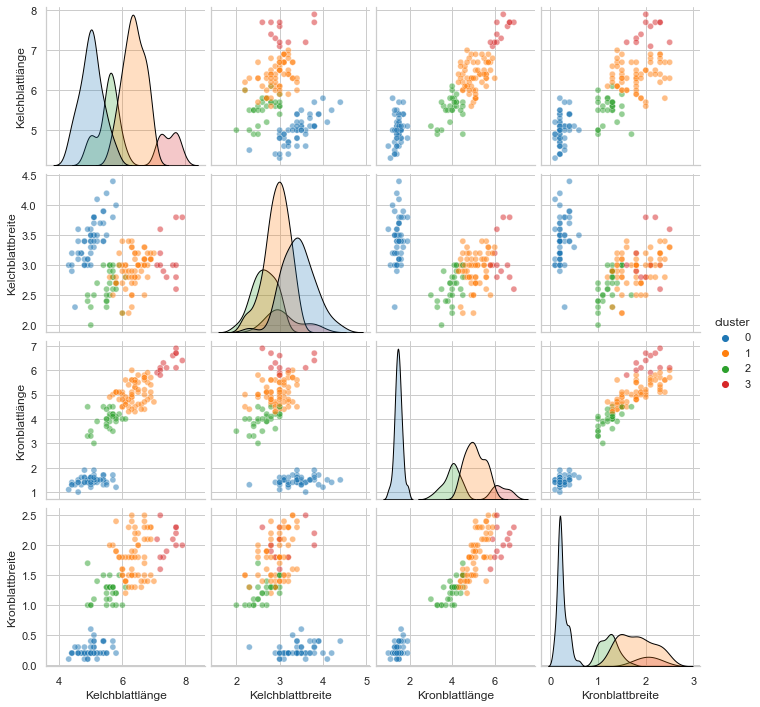

In [9]:
# Pairplot after color
g2 = sns.pairplot(df_cluster,
                  hue="cluster",
                  palette="tab10",
                  plot_kws=dict(alpha=0.5),
                  diag_kws=dict(edgecolor="black"))
plt.show()